In [2]:
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, BatchNormalization, MaxPool2D, Flatten, Activation
from tensorflow.keras.regularizers import L2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train = 'Brain Tumor/Training'
test = 'Brain Tumor/Testing'

In [6]:
classes = os.listdir(test)

In [7]:
classes

['meningioma_tumor', 'pituitary_tumor', 'no_tumor', 'glioma_tumor']

In [9]:
x = []
y = []
c = 0
for folder in classes:
    if folder == '.ipynb_checkpoints':
        continue
    for file in os.listdir(os.path.join(test, folder)):
        # print(file)
        # break
        if file == '.ipynb_checkpoints':
            continue
        # c+=1
        # if c<=2315:
        #     continue
        img = Image.open(os.path.join(os.path.join(test, folder), file))
        img = np.array(img)
        img = img/255.
        img = np.resize(img,(128, 128, 3))
        
        if img is not None:
            x.append(img)
            y.append(classes.index(folder))
            if len(x)%100 == 0:
                print("Images added  =", len(x))

Images added  = 100
Images added  = 200
Images added  = 300


In [6]:
np.save('x', x)
np.save('y', y)

In [10]:
len(x1)

2315

In [7]:
# y = np.load('y.npy')
x = np.load('x.npy')

In [5]:
y = tf.keras.utils.to_categorical(y)

In [9]:
x

array([[[[0.01960784, 0.01960784, 0.01960784],
         [0.01960784, 0.01960784, 0.01960784],
         [0.01960784, 0.01960784, 0.01960784],
         ...,
         [0.02745098, 0.02745098, 0.02745098],
         [0.02745098, 0.02745098, 0.02745098],
         [0.02745098, 0.02745098, 0.02745098]],

        [[0.01960784, 0.01960784, 0.01960784],
         [0.01960784, 0.01960784, 0.01960784],
         [0.01960784, 0.01960784, 0.01960784],
         ...,
         [0.03137255, 0.03137255, 0.03137255],
         [0.03137255, 0.03137255, 0.03137255],
         [0.03137255, 0.03137255, 0.03137255]],

        [[0.03137255, 0.03137255, 0.03137255],
         [0.03137255, 0.03137255, 0.03137255],
         [0.03137255, 0.03137255, 0.03137255],
         ...,
         [0.01568627, 0.01568627, 0.01568627],
         [0.01176471, 0.01176471, 0.01176471],
         [0.01176471, 0.01176471, 0.01176471]],

        ...,

        [[0.02745098, 0.02745098, 0.02745098],
         [0.03137255, 0.03137255, 0.03137255]

In [4]:
x = np.concatenate((x1, x2))
y = np.concatenate((y1, y2))

In [18]:
x = np.concatenate((x1, np.array(x)))

In [20]:
y = np.concatenate((y1, np.array(y)))

In [12]:
x.shape

(3240, 128, 128, 3)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 10)

In [13]:
x_test, x_cv, y_test, y_cv = train_test_split(x_test, y_test, test_size = 0.5, random_state = 10)

In [16]:
x_test.shape

(162, 128, 128, 3)

In [20]:
np.save('x_train', x_train)
np.save('y_train', y_train)
np.save('x_test', x_test)
np.save('y_test', y_test)
np.save('x_cv', x_cv)
np.save('y_cv', y_cv)

In [4]:
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_cv = np.load('x_cv.npy')
y_cv = np.load('y_cv.npy')

In [5]:
x_train.shape

(2916, 128, 128, 3)

### Model

In [139]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape = (128, 128, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D((2, 2)),
    
    Conv2D(64, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D((2, 2)),
    
    Conv2D(128, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D((2, 2)),
    
    Conv2D(256, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D((2, 2)),
    
    Conv2D(32, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D((2, 2)),
    
    Flatten(),
    Dropout(0.6),
    Dense(128, activation = 'relu'),
    
    Dense(4, activation = 'softmax')
])

In [140]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_60 (Batc (None, 126, 126, 32)      128       
_________________________________________________________________
activation_60 (Activation)   (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_61 (Batc (None, 61, 61, 64)        256       
_________________________________________________________________
activation_61 (Activation)   (None, 61, 61, 64)      

In [141]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = 'accuracy')

In [142]:
cb = ModelCheckpoint(filepath = 'model.ckpt', save_best_only=True, save_weights_only=True, verbose = 1)

In [121]:
model.load_weights('model2.ckpt')

In [122]:
model.evaluate(x_cv, y_cv)

6/6 [==============================] - 0s 9ms/step - loss: 0.3534 - accuracy: 0.8704


[0.3534114956855774, 0.8703703880310059]

In [124]:
model.evaluate(x_train, y_train)

92/92 [==============================] - 1s 9ms/step - loss: 0.2228 - accuracy: 0.9023


[0.22284281253814697, 0.9022634029388428]

In [143]:
model.fit(x_train, y_train, epochs = 100, callbacks=[cb], validation_data=(x_cv, y_cv))

Epoch 1/100
92/92 [==============================] - 3s 26ms/step - loss: 1.2881 - accuracy: 0.4050 - val_loss: 1.3116 - val_accuracy: 0.3272

Epoch 00001: val_loss improved from inf to 1.31156, saving model to model.ckpt
Epoch 2/100
92/92 [==============================] - 2s 23ms/step - loss: 1.1331 - accuracy: 0.4798 - val_loss: 1.5951 - val_accuracy: 0.3333

Epoch 00002: val_loss did not improve from 1.31156
Epoch 3/100
92/92 [==============================] - 2s 23ms/step - loss: 1.0758 - accuracy: 0.5106 - val_loss: 2.4466 - val_accuracy: 0.2716

Epoch 00003: val_loss did not improve from 1.31156
Epoch 4/100
92/92 [==============================] - 2s 23ms/step - loss: 1.0478 - accuracy: 0.5285 - val_loss: 1.9087 - val_accuracy: 0.2778

Epoch 00004: val_loss did not improve from 1.31156
Epoch 5/100
92/92 [==============================] - 2s 23ms/step - loss: 1.0063 - accuracy: 0.5436 - val_loss: 1.4878 - val_accuracy: 0.3827

Epoch 00005: val_loss did not improve from 1.31156
Ep

KeyboardInterrupt: 

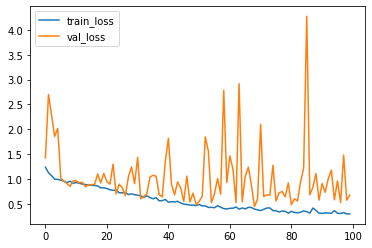

In [138]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(['train_loss', 'val_loss'])

In [125]:
model.save('model2.h5')

In [21]:
model.save('base_model.h5')

### Comparison

In [146]:
model1 = tf.keras.models.load_model('model2.h5')
model2 = tf.keras.models.load_model('model1.h5')

In [145]:
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [147]:
model1.evaluate(x_cv, y_cv)

6/6 [==============================] - 0s 9ms/step - loss: 0.3534 - accuracy: 0.8704


[0.3534114956855774, 0.8703703880310059]

In [148]:
model2.evaluate(x_cv, y_cv)

6/6 [==============================] - 0s 8ms/step - loss: 0.3630 - accuracy: 0.8580


[0.36303749680519104, 0.8580247163772583]

In [149]:
pred_1 = model1.predict(x_test)
pred_2 = model2.predict(x_test)

In [151]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [157]:
pred_1 = np.argmax(pred_1, axis = -1)
pred_2 = np.argmax(pred_2, axis = -1)


In [161]:
y_test = np.argmax(y_test, axis = 1)

In [163]:
cr1 = classification_report(y_test, pred_1)
cr2 = classification_report(y_test, pred_2)

In [164]:
print("Classification Report for model2.h5")
print(cr1)

Classification Report for model2.h5
              precision    recall  f1-score   support

           0       0.83      0.74      0.78        46
           1       0.80      0.98      0.88        41
           2       0.87      0.93      0.90        29
           3       0.90      0.78      0.84        46

    accuracy                           0.85       162
   macro avg       0.85      0.86      0.85       162
weighted avg       0.85      0.85      0.84       162



In [165]:
print("Classification Report for model1.h5")
print(cr2)

Classification Report for model1.h5
              precision    recall  f1-score   support

           0       0.81      0.76      0.79        46
           1       0.86      0.93      0.89        41
           2       0.93      0.97      0.95        29
           3       0.84      0.83      0.84        46

    accuracy                           0.86       162
   macro avg       0.86      0.87      0.87       162
weighted avg       0.86      0.86      0.86       162



In [166]:
cm1 = confusion_matrix(y_test, pred_1)
cm2 = confusion_matrix(y_test, pred_2)

In [167]:
cm1_dis = ConfusionMatrixDisplay(cm1)
cm2_dis = ConfusionMatrixDisplay(cm2)

Confusion Matrix for model2.h5


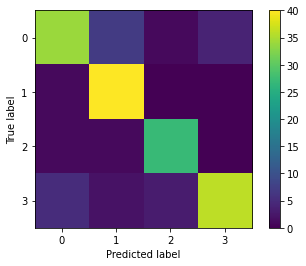

In [170]:
print('Confusion Matrix for model2.h5')
cm1_dis.plot(include_values = False)

Confusion Matrix for model1.h5


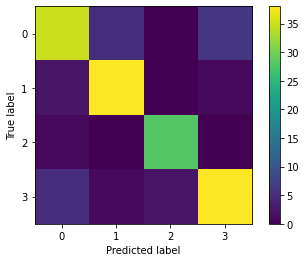

In [171]:
print('Confusion Matrix for model1.h5')
cm2_dis.plot(include_values = False)

In [172]:
from sklearn.metrics import f1_score

In [174]:
f1_model1 = f1_score(y_test, pred_1, average = 'weighted')
f1_model2 = f1_score(y_test, pred_2, average = 'weighted')

In [175]:
print('F1 score for model2.h5 =', f1_model1)
print('F1 score for model1.h5 =', f1_model2)

F1 score for model2.h5 = 0.8432691786385094
F1 score for model1.h5 = 0.8566765738068312


### Best Model

The best model is stored in model1.h5